# How Spotify is Changing the Music Industry

[1. Introduction](#Introduction)
<br>
[2. Key Questions](#Questions)
<br>
[3. Analysis](#Analysis)
<br>
[4. Improvements](#Improvements)
<br>
[5. Conclusion](#Conclusion)
<br>
[6. Sources](#Sources)

## Introduction

The inspiration for this project was based off of this episode of Vox's Switched on Pop podcast titled, "How Streaming Changed the Sound of Pop" ([link](https://switchedonpop.com/episodes/how-streaming-changed-the-sound-of-pop)), which discusses the on going changes in the music industry and specifically how these changes are caused by streaming services' as a platform for popular music. The podcast along with the articles articles linked below consider the many variables that need to be considred with the said changes in music.

First, there is the financial aspect of this issue because gone are the days of buying CDs and albums. Whereas before artists' profits from their music relied solely on CD and album sales, now as streaming services become the primary method of listening to music, artists are also dependent on this as a factor of their sales. However, much to the artists' dismay, streaming services' payment model is not generous for the artist. Usually a song earns \$0.004 per stream, depending on Spotify, so 1000 streams of a song equals four dollars, and of that four dollars the streaming service company takes 30% of that revenue. On top of the 30% the artists' recording comapany gets another portion of the revenue, and the artist typically garners about 10% of the total streaming revenue.

Two, how long is a stream? For artists to earn the \$0.004 USD per stream, a user has to listen to the first 30 seconds of the song. Which means that there is a emphasis on the songs that are being marketed on Spotify to have a shorter intro, that hooks the listener. Additionally skip rates are another to factor into this equation because if a listener is not hooked in the first 30 seconds then they are likely to skip the song, which reduces the chances of the song making money. All of which has led to songs becoming shorter and shorter, to about 2:30 minutes or 150 seconds, or shorter. Below are two charts from Billboard that highlight these relations the best as the length of the songs is decreasing but the number of songs that are less than 150 seconds, a relation that is indirectly proportion to the BPM, is increasing.

![image](Billboard_length.png)

![image](Billboard_trackduration.png)

# Questions

Given all of the changes being done to the music industry through Spotify as streaming stream, and using a dataset I found on Kaggle ([link](https://www.kaggle.com/reach2ashish/top-100-spotify-songs-2019)), which lists the top 100 most streamed songs on Spotify at the end of 2019, I want to answer the following questions:
- **What is the most popular genre on Spotify?**
    - This question is a general question to answer for any trends we may see in the overall pattern of songs. I suspect this will be pop as that is the most popular genre of songs in the past couple decades.
- **What is the most common beats per minutes (BPM) for the most streamed songs?**
    - This question goes hand in hand with the most popular genre on Spotify, as these two are often connected. Additionally, the shorter a song the more likely it is to have a highter BPM.
- **How long are the most popular songs?**
    - As mentioned before in the introduction, in general, songs are getting shorter to about 150 seconds or less, so this is important to evalue the top 100 streamed songs on Spotify to see is this pattern holds.
- **Change in the length of songs over time?**
    - The dataset I am working with only features the top 100 streams on Spotify starting from 2016 but using the data from 2016 to 2019, I will evaluate if the song lengths changed during this time.

Also, below are the variables in the data set which will be used for the analysis of these questions:
- Title
- Artist
- Top Genre
- Year 
- BPM, beats per minute
- Energy
- Danceablility
- Loudness
- Livenss
- Valence
- Duration (s)
- Acousticness
- Speechiness
- Popularity

# Analysis

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model

import random
from random import randint

In [90]:
df = pd.read_csv("spotify_top_100_2019.csv", encoding='ISO-8859-1')
df.head()

,title,artist,top genre,year,bpm,energy,danceability,loudness,liveness,valence,duration_s,acousticness,speechiness,popularity
0,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
1,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
2,goosebumps,Travis Scott,rap,2016,130,73,84,-3,15,43,244,8,5,86
3,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,86
4,Closer (feat. Halsey),The Chainsmokers,electropop,2016,95,52,75,-6,11,66,245,41,3,85


Text(0.5, 1.0, 'Most Common Genre')

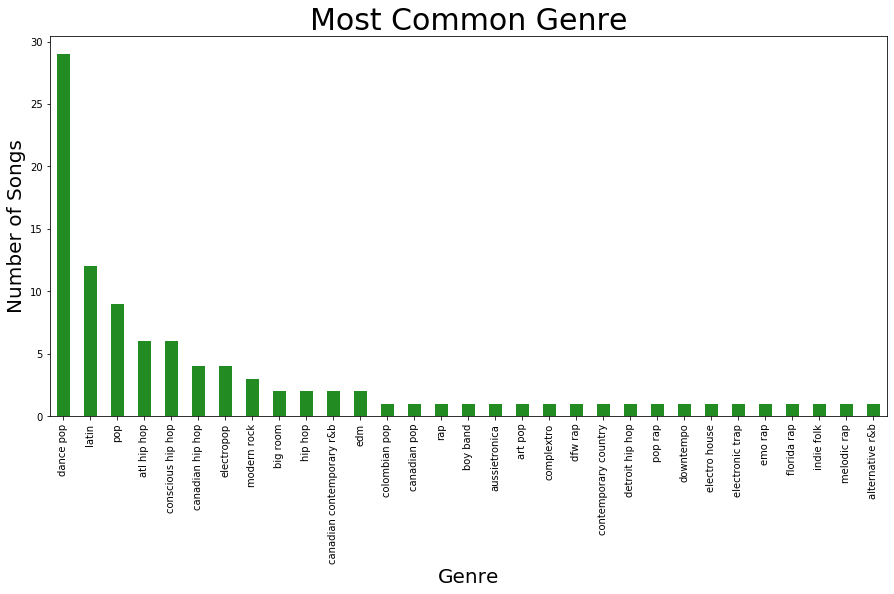

In [143]:
fig = plt.figure(figsize = (15,7))
df.groupby('top genre')['title'].agg(len).sort_values(ascending = False).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number of Songs', fontsize = 20)
plt.title('Most Common Genre', fontsize = 30)

Text(0.5, 1.0, 'Number of Songs vs. BPM')

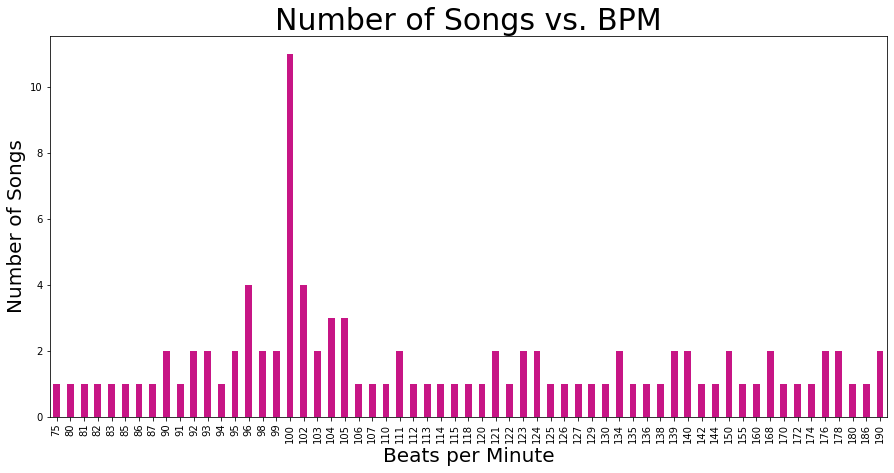

In [152]:
fig = plt.figure(figsize = (15,7))
df.groupby('bpm')['title'].agg(len).plot(kind = 'bar', color = 'mediumvioletred')
plt.xlabel('Beats per Minute', fontsize = 20)
plt.ylabel('Number of Songs', fontsize = 20)
plt.title('Number of Songs vs. BPM', fontsize = 30)

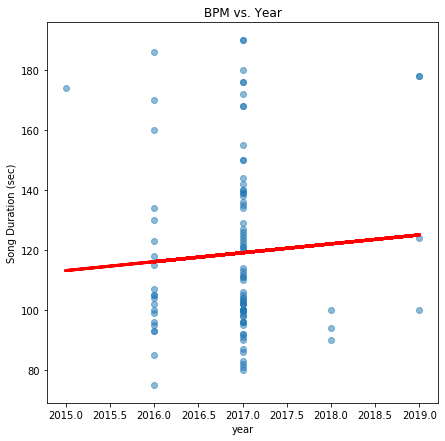

In [133]:
x = df["year"].values
y = df["bpm"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(7, 7))

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks()
plt.yticks()

plt.xlabel("year")
plt.ylabel("Song Duration (sec)")
plt.title("BPM vs. Year")


plt.show()

Text(0.5, 1.0, 'Number of Songs vs. Track Duration')

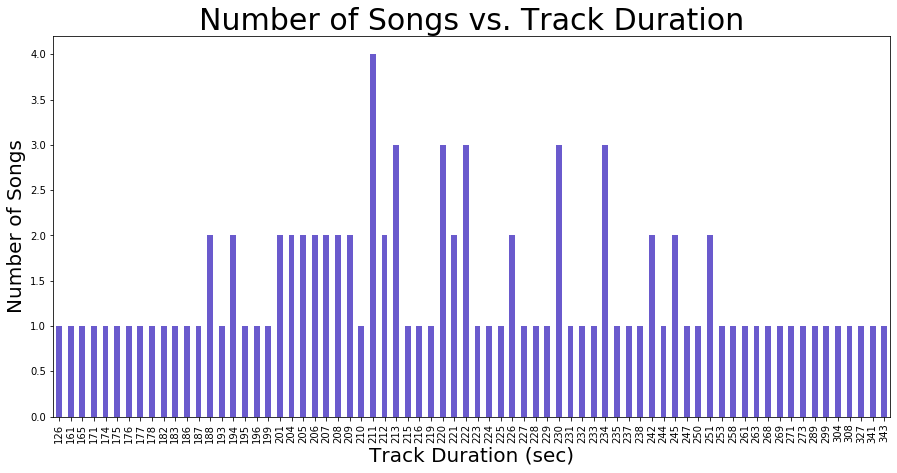

In [161]:
fig = plt.figure(figsize = (15,7))
df.groupby('duration_s')['title'].agg(len).plot(kind = 'bar', color = 'slateblue')
plt.xlabel('Track Duration (sec)', fontsize = 20)
plt.ylabel('Number of Songs', fontsize = 20)
plt.title('Number of Songs vs. Track Duration', fontsize = 30)

Text(0.5, 1.0, 'Duration of Tracks vs. Year')

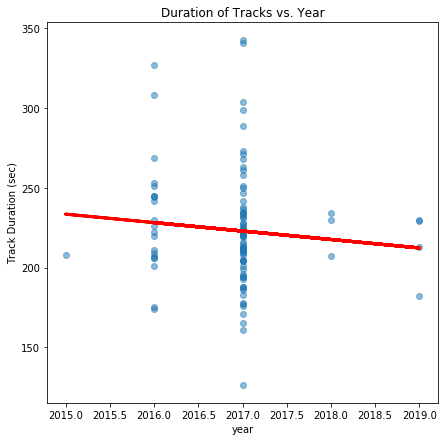

In [155]:
x = df["year"].values
y = df["duration_s"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(7, 7))

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks()
plt.yticks()

plt.xlabel("year")
plt.ylabel("Track Duration (sec)")
plt.title("Duration of Tracks vs. Year")

Overall, I was satisfied with the findings of the data as they showed what I expected to find with the general trends in music on Spotify. Figure 1 ("Most Common Genre") demonstrates that by a long shot, "dance pop" is the most common genre which I expected to find given the popularity of pop music in the past three decades. Figure 2 ("Number of Songs vs. BPM") also shows what I had expected that, since the most common genre is pop, the BPM should follow common BPM trends with pop music. However, I was surpised to see that the most common BPM is 100 beats per music because typically for pop music the most common BPM is expected to be around 120. Additionally, I was pleased to see in figure 3 ("BPM vs. Year") the correlation of BPM over the years as general increasing because that has been the trend with shorter music leading to faster songs, so they can attract the listeners quicker.

With figures four ("Number of Songs vs. Track Duration") and five ("Duration of Tracks vs. Year") I found results different from what I was expecting. For figure four, the most common track duration is 211 seconds (3.5 minutes), however, because that only amounts to about four tracks it is best to look at the track durations as a whole. Which are are spreadout throughout the spectrum of two to five minute songs, however, the majority of the songs fall in the category of over 211 seconds, or 3.5 minutes, which I had not expected to see. On the other hand, for figure five, I had expected to see that the duration of songs is decreasing over the years, but the data for that might have been skewed as I will disucss in the improvements section.

# Improvements

One of the key areas of improvement for this analysis would be the dataset, itself, because though the dataset tracks the top 100 streamed songs at the end of 2019, the dataset only starts listing songs beginning in 2016. While the 100 songs do provide a good dataset for the given assignemnt, this dataset only gives us a slice of the overall data that Spotify has massed, and limits the amount of analysis we can do, additionally this dataset differs from the the data presented by Spotify on the top songs streamed songs in the platform. [Linked Here](https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify)

Another area of improvement for this dataset would be to have the number of times a song was streamed because though this is currently ranked from 0-99 for the top 100 songs, those number will have been changed or not been as necessary when evaluating songs within a certain year. So in order to best highlight the streaming data it would have been necessary to include the exact number of times the track was streamed. Also, the dataset includes a "popularity" variable, but that is never defined and doesn't provide any insight onto how it was measured.

Lastly, a big improvement for this study would have been to feature data from other streaming services because while Spotify dominates the streaming industry there are nuances to other streaming platforms such as Apple Music, SoundCloud, etc., that would have been interesting to evaluate with their relation to their artists and the platform. Furthermore, like the BillBoard charts mentioned in the introduction it would have been interesting to see if there were similar results.

# Conclusion

Overall, I was surprised by the results of the study as they more or less found what I was expecting. I believe that though the findings of this data are coherent with the general trends of Spotify and it's impact on the music industry, with a larger dataset might have been different. With a larger dataset I believe the data could account for more compexities in these relations between the variables and their impact on music, that the current dataset was not able to, but ultimately the general trend remains the same. 

The similarly between the Billboard charts at the introduction and the two regression charts (figures three and five), indidcate this the best, that the trend of music changing due to technology is not new and will not be new for the next few decades. As we live in a world more and more fabricated by the internet and it's platforms, our taste and preferences of content within these platforms in turn are being shaped by them, as well.

# Sources

- https://switchedonpop.com/episodes/how-streaming-changed-the-sound-of-pop
- https://pitchfork.com/features/article/uncovering-how-streaming-is-changing-the-sound-of-pop/
- https://www.theverge.com/2019/5/28/18642978/music-streaming-spotify-song-length-distribution-production-switched-on-pop-vergecast-interview
- https://qz.com/quartzy/1438412/the-reason-why-your-favorite-pop-songs-are-getting-shorter/